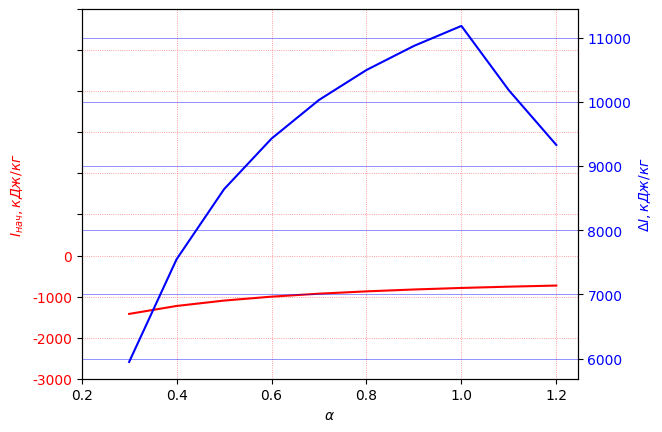

,alpha,S
0,0.3,3.528023
1,0.4,4.772562
2,0.5,5.752301
3,0.6,6.554906
4,0.7,7.243280
5,0.8,7.838834
6,0.9,8.366242
7,1.0,8.831767
8,1.1,8.224684
9,1.2,7.698711


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


"""
ТОПЛИВО H2O2
"""

"""ВХОДНЫЕ ДАННЫЕ"""
I_G = -3843    # Удельная (полная) энтальпия горючего
I_O = -405     # Удельная (полная) энтальпия оксилителя
KM_0 = 7.937   # Стехиометрическое соотношение

# Энтальпия, посчитанная в АСТРА при Т_ст = 1000, p_кам = 10 МПа
I_wall = [-7370, -8777, -9737, -10430, -10960, -11370, -11700, -11974, -10940, -10061]

# Следующие значения посчитаны для alpha в АСТРА 
alpha = np.arange(0.3, 1.3, 0.1)
T_og =   [ 2098,  2581,  2966,  3256,   3458,   3582,   3640,   3650,   3636,   3600]
R_og =   [ 1220,  989,   835,   728,    650,    592,    548,    515,    489,    467]


"""РАСЧЕТ РАЗНОСТЕЙ ЭНТАЛЬПИЙ"""
I_start = I_G * (1 / (1 + alpha*KM_0)) + I_O * (alpha*KM_0 / (1 + alpha*KM_0))
delta_I = I_start - I_wall

# Построение графика
def plot_enthalpy():
    # Создание объекта fig и осей ax
    fig, ax = plt.subplots()

    # Построение I_нач графика
    ax.plot(alpha, I_start, color='red')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$I_{нач}, кДж/ кг$', color='red')
    ax.tick_params(axis='y', labelcolor='red')
    ax.grid(True, linestyle=':', linewidth=0.6, color='red', alpha=0.5)
    # Настройка шкалы ординат по значениям
    y_ticks = np.arange(-3000, 6500, 1000)
    ax.set_yticks(y_ticks)
    # Определение значений, которые будут отображаться на графике
    y_ticklabels = [str(y_tick) if y_tick <= 0 else '' for y_tick in y_ticks]
    # Назначение меток на шкале ординат
    ax.set_yticklabels(y_ticklabels)

    # Создание delta_I оси ординат и ее графика
    ax2 = ax.twinx()
    ax2.plot(alpha, delta_I, color='blue')
    ax2.set_ylabel(fr'$\Delta I, кДж/ кг$', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.grid(True, linestyle='-', linewidth=0.6, color='blue', alpha=0.5)
    x_ticks = np.arange(0.2, 1.3, .2)
    ax2.set_xticks(x_ticks)

    # Отображение графика
    plt.show()


"""РАСЧЕТ S ФУНКЦИИ"""
def sol_S():
    MU = 340e-7
    T_ST = 1000
    s_function = []
    for alpha in range(0, 10):
        s_function.append(
            delta_I[alpha] * (MU**.15 / R_og[alpha]**.425) * (T_og[alpha]**.425 / ((T_og[alpha] + T_ST)**.595 * (3*T_og[alpha] + T_ST)**.15))
        )
    return s_function


"""ВЫВОД"""
plot_enthalpy()
pd.DataFrame({'alpha': alpha, 'S': sol_S()})

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


"""
ТОПЛИВО МЕТАН + КИСЛОРОД
"""

"""ВХОДНЫЕ ДАННЫЕ"""
I_G = -5566    # Удельная (полная) энтальпия горючего
I_O = -405     # Удельная (полная) энтальпия оксилителя
KM_0 = 3.98923   # Стехиометрическое соотношение

# Энтальпия и вязкость, посчитанные в АСТРА при Т_ст = 600, 800, 1000, 1200, 1400, 1600
I_wall = -1 * np.array([
    [7579, 8425, 9003, 9422, 9739, 9993, 10205, 10381, 10535, 9733],
    [6875, 7787, 8420, 8881, 9242, 9532, 9773 , 9981 , 10223, 9429],
    [5456, 6489, 7202, 7778, 8252, 8660, 9038 , 9438 , 9889 , 9105],
    [2852, 3997, 5085, 6057, 6935, 7726, 8424 , 9025 , 9537 , 8762],
    [575 , 2008, 3736, 5172, 6313, 7234, 7991 , 8627 , 9169 , 8405],
    [-676, 1064, 3105, 4639, 5827, 6778, 7562 , 8221 , 8786 , 8034]]
)
Mu = 10**(-7) * np.array([
    [207, 215, 222, 227, 232, 235, 237, 239, 240, 246],
    [268, 280, 289, 296, 301, 305, 308, 310, 310, 317],
    [327, 342, 353, 360, 366, 370, 373, 375, 374, 381],
    [383, 400, 412, 419, 425, 428, 431, 432, 433, 439],
    [429, 449, 461, 470, 475, 480, 483, 485, 488, 494],
    [469, 491, 506, 516, 523, 528, 532, 536, 539, 546]]
)

# Следующие значения посчитаны для alpha в АСТРА 
alpha = np.arange(0.2, 1.2, 0.1)
T_og = [1200, 1342, 1857, 2544, 3055, 3366, 3505, 3545, 3542, 3518]
R_og = [629 , 637 , 598 , 519 , 462 , 422 , 395 , 375 , 360 , 349 ]


"""РАСЧЕТ РАЗНОСТЕЙ ЭНТАЛЬПИЙ"""
I_start = I_G * (1 / (1 + alpha*KM_0)) + I_O * (alpha*KM_0 / (1 + alpha*KM_0))
delta_I = I_start - I_wall

# Построение графика
def plot_enthalpy():
    # Создание объекта fig и осей ax
    fig, ax = plt.subplots()

    # Построение I_нач графика
    ax.plot(alpha, I_start, color='red')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$I_{нач}, кДж/ кг$', color='red')
    ax.tick_params(axis='y', labelcolor='red')
    ax.grid(True, linestyle=':', linewidth=0.6, color='red', alpha=0.5)
    # Настройка шкалы ординат по значениям
    y_ticks = np.arange(-3000, 6500, 1000)
    ax.set_yticks(y_ticks)
    # Определение значений, которые будут отображаться на графике
    y_ticklabels = [str(y_tick) if y_tick <= 0 else '' for y_tick in y_ticks]
    # Назначение меток на шкале ординат
    ax.set_yticklabels(y_ticklabels)

    # Создание delta_I оси ординат и ее графика
    ax2 = ax.twinx()
    ax2.plot(alpha, delta_I, color='blue')
    ax2.set_ylabel(fr'$\Delta I, кДж/ кг$', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.grid(True, linestyle='-', linewidth=0.6, color='blue', alpha=0.5)
    x_ticks = np.arange(0.2, 1.3, .2)
    ax2.set_xticks(x_ticks)

    # Отображение графика
    plt.show()


"""РАСЧЕТ S ФУНКЦИИ"""
def sol_S():
    # MU = 340e-7
    T_st = [600, 800, 1000, 1200, 1400, 1600]
    s_function = np.ones((6,10))
    for i in range(0, 6):
        for alpha in range(0, 10):
            res = delta_I[i][alpha] * (Mu[i][alpha]**.15 / R_og[alpha]**.425) * (T_og[alpha]**.425 / ((T_og[alpha] + T_st[i])**.595 * (3*T_og[alpha] + T_st[i])**.15))
            if res >= 0:
                s_function[i][alpha] = res
            else:
                s_function[i][alpha] = 0
    return s_function


"""ВЫВОД"""
# plot_enthalpy()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame({'alpha': alpha, 'S, T=600': sol_S()[0], 'S, T=800': sol_S()[1], 'S, T=1000': sol_S()[2], 'S, T=1200': sol_S()[3], 'S, T=1400': sol_S()[4], 'S, T=1600': sol_S()[5]}).transpose()
# sol_S()
# delta_I

,0,1,2,3,4,5,6,7,8,9
alpha,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,1.10
"S, T=600",3.72,4.84,5.56,6.19,6.73,7.22,7.68,8.10,8.47,7.94
"S, T=800",3.01,4.19,5.01,5.72,6.33,6.87,7.35,7.80,8.25,7.71
"S, T=1000",1.77,3.02,3.93,4.75,5.45,6.09,6.68,7.29,7.92,7.39
"S, T=1200",0.00,0.97,2.15,3.26,4.28,5.22,6.09,6.86,7.55,7.01
"S, T=1400",0.00,0.00,1.05,2.48,3.70,4.74,5.64,6.43,7.14,6.61
"S, T=1600",0.00,0.00,0.54,2.01,3.24,4.29,5.20,6.00,6.71,6.19


In [ ]:
{3.72, 4.84, 5.56, 6.19, 6.73, 7.22, 7.68, 8.10, 8.47, 7.94},
{3.01, 4.19, 5.01, 5.72, 6.33, 6.87, 7.35, 7.80, 8.25, 7.71},
{1.77, 3.02, 3.93, 4.75, 5.45, 6.09, 6.68, 7.29, 7.92, 7.39},
{0.00, 0.97, 2.15, 3.26, 4.28, 5.22, 6.09, 6.86, 7.55, 7.01},
{0.00, 0.00, 1.05, 2.48, 3.70, 4.74, 5.64, 6.43, 7.14, 6.61},
{0.00, 0.00, 0.54, 2.01, 3.24, 4.29, 5.20, 6.00, 6.71, 6.19}

In [ ]:
from CoolProp.Plots import PropertyPlot

plot = PropertyPlot('HEOS::Water', 'TS')

plot.calc_isolines()

plot.show()

/usr/local/Caskroom/miniconda/base/envs/unienv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


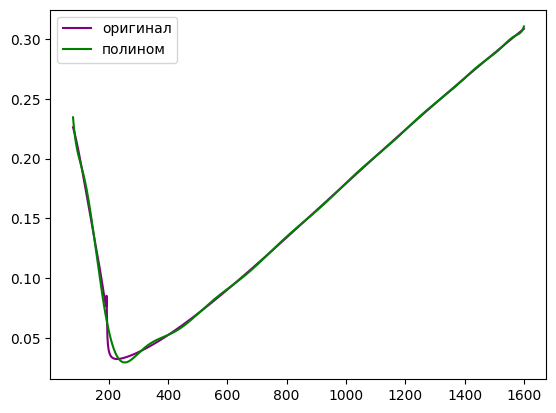

[0.23444655 0.23152504 0.22880654 ... 0.30893513 0.30957338 0.31027776]
0.20096272262976989


array([ 2.14917366e-60, -2.51570909e-56,  1.21912430e-52, -2.94617337e-49,
        2.72286030e-46,  3.20325980e-43, -9.66110981e-40,  8.19859293e-38,
        2.34918950e-33, -2.64535023e-30, -2.76776836e-27,  1.14577849e-23,
       -1.66434743e-20,  1.49500743e-17, -9.24786687e-15,  4.06693747e-12,
       -1.27387637e-09,  2.79131554e-07, -4.11977494e-05,  3.83981006e-03,
       -2.02433667e-01,  4.79346268e+00])

In [150]:
from CoolProp.CoolProp import PropsSI

T_min = 80
T_max = 1600
dT = 1

T_arr = [T for T in range(int(T_min), int(T_max) + 1, dT)]
rho_arr = [PropsSI('L', 'T', T, 'P', 5e6, 'methane') for T in T_arr]

data = np.array([T_arr, rho_arr])
poly_coef = np.polyfit(data[0], data[1], deg=21)
poly_func = np.poly1d(poly_coef)
rho = poly_func(T_arr)

plt.plot(T_arr, rho_arr, label='оригинал', color="purple")
plt.plot(T_arr, rho, label='полином', color="green")
plt.legend()
plt.show()
print(rho)
print(poly_func(100))
poly_coef

In [191]:
from CoolProp.CoolProp import PropsSI

T_min = 100
T_max = 650
dT = 50

T_arr = [T for T in range(T_min, T_max + 1, dT)]
# T_arr = [T for T in range(int(T_min), int(T_max) + 1, dT)]
cp_arr = [PropsSI('C', 'T', T, 'P', 5e6, 'methane') for T in T_arr]
cp2_arr = [PropsSI('C', 'T', T, 'P', 4e6, 'methane') for T in T_arr]
mu_arr = [PropsSI('V', 'T', T, 'P', 4e6, 'methane') for T in T_arr]

# data = np.array([T_arr, cp2_arr])
# poly_coef = np.polyfit(data[0], data[1], deg=21)
# poly_func = np.poly1d(poly_coef)
# rho = poly_func(T_arr)

# plt.plot(T_arr, cp_arr, label='оригинал', color="purple")
# plt.plot(T_arr, rho, label='полином', color="green")
# plt.legend()
# plt.show()
# print(rho)
# print(poly_func(100))
# poly_coef
df = pd.DataFrame(data=data)
# df = pd.DataFrame(data=data).transpose()
# df["p=4e6"] = cp2_arr
for i in range(len(mu_arr)):
    df.at["mue7", i] = f'{round(mu_arr[i]* 10**4,2)},'
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,100.00,150.00,200.00,250.00,300.00,350.00,400.00,450.00,500.00,550.00,600.00,650.00
1,3379.84,3868.44,4122.44,2647.02,2492.94,2531.11,2645.19,2795.57,2963.08,3137.45,3313.00,3486.53
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mue7,"1.63,","0.61,","0.09,","0.1,","0.12,","0.13,","0.15,","0.16,","0.17,","0.19,","0.2,","0.21,"
